## Бинаризация изображения методом Отсу

In [199]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import random
from PIL import Image, ImageDraw #Подключим необходимые библиотеки.

%matplotlib inline


In [200]:
image = Image.open("temp2.jpg") #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

In [201]:
from skimage import io
img = io.imread('temp2.jpg', as_grey=True) # матрица с уровнями серого всех пикселей

In [202]:
ODNOMERN_img = np.reshape(img, width*height)

In [203]:
sort_img = sorted(ODNOMERN_img)

In [204]:
img_series = pd.Series(sort_img)

## Гистограмма распределения пикселей по уровням серости

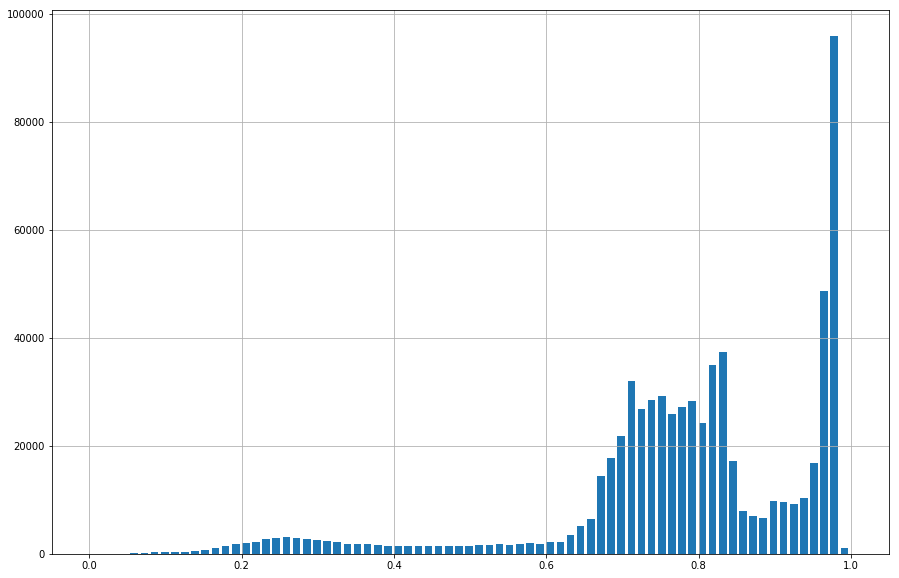

In [205]:
img_series.hist(bins = 75, figsize = (15, 10), width =0.01);

In [206]:
img_counts_array = img_series.value_counts()

In [207]:
img_counts_sorted = img_counts_array.sort_index(ascending = True)

In [208]:
grey_levels = np.array(img_counts_sorted.index)
numbers_of_pixels = np.array(img_counts_sorted.values)

In [209]:
N_0 = width*height
n = grey_levels.size
w = np.zeros(n)

In [210]:
k = 0
i = 0
for k in range(n):
    w[k] = sum(numbers_of_pixels[:k+1])

In [211]:
for k in range(n):
    w[k] = w[k]/N_0

In [212]:
mu = np.zeros(n)

In [ ]:
j = 0
i = 0
for j in range(n):
    for i in range(j+1):
        mu[j] = mu[j] + ((numbers_of_pixels[i]/N_0)*grey_levels[i])

In [ ]:
var = np.zeros(n)

In [ ]:
k = 0
for k in range(n-1):
    var[k] = (((mu[n-1]*w[k]) - mu[k])**2)/(w[k]*(1 - w[k]))

In [ ]:
k_star = var.argmax()

In [ ]:
grey_level_porog = grey_levels[k_star]

In [ ]:
grey_level_porog

In [ ]:
i = 0
j = 0
for i in range(width):
    for j in range(height):
        red = pix[i, j][0]
        green = pix[i, j][1]
        blue = pix[i, j][2]
        if (img[j, i] > grey_level_porog):
            red, green, blue = 255, 255, 255
        else:
            red, green, blue = 0, 0, 0
        draw.point((i, j), (red, green, blue))


In [ ]:
image



In [ ]:
pix[0, 0]